<a href="https://colab.research.google.com/github/MicaelaRomeroC3/Makita/blob/main/Nuevo_desarrollo_Makita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **🔹 EVALUACIÓN DE COMPETENCIAS MAKITA**
# Google Colab + Python + Drive

In [63]:
# 1️⃣ Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# 2️⃣ Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [65]:
# 3️⃣ Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")
rcParams['figure.figsize'] = (12, 8)

print("🚀 INICIANDO ANÁLISIS DE EVALUACIONES MAKITA")
print("=" * 60)

🚀 INICIANDO ANÁLISIS DE EVALUACIONES MAKITA


In [66]:
# 4️⃣ Rutas de los archivos en tu Drive
ruta_medidor = '/content/drive/MyDrive/Makita/Desarrollo Dashboard/Medidor Colab Makita.xlsx'
ruta_estructura = '/content/drive/MyDrive/Makita/Desarrollo Dashboard/ESTRUCTURA BBDD MAKITA PRUEBA.xlsx'
ruta_salida = '/content/drive/MyDrive/Makita/Desarrollo Dashboard/Resultados_Makita_Completos.xlsx'

In [67]:
# 5️⃣ Cargar los archivos
medidor = pd.read_excel(ruta_medidor)
estructura = pd.read_excel(ruta_estructura)

print("✅ Archivos cargados correctamente")
print(f"Medidor: {medidor.shape} (filas x columnas)")
print(f"Estructura: {estructura.shape} (filas x columnas)")

✅ Archivos cargados correctamente
Medidor: (44, 4) (filas x columnas)
Estructura: (4, 63) (filas x columnas)


In [68]:
# 6️⃣ Limpieza básica de nombres de columnas
medidor.columns = medidor.columns.str.strip()
estructura.columns = estructura.columns.str.strip()

# Mostrar información básica de los datos
print("\n📊 INFORMACIÓN DE LOS DATOS CARGADOS:")
print("\nPrimeras filas de Medidor (competencias):")
print(medidor.head(3))
print("\nPrimeras filas de Estructura (evaluaciones):")
print(estructura[['Evaluado', 'TipoEvaluador', 'VALORACIÓN', 'P1.1', 'P1.2']].head(3))


📊 INFORMACIÓN DE LOS DATOS CARGADOS:

Primeras filas de Medidor (competencias):
                                          grupo  \
0  Autoconocimiento y Conocimiento de los Demás   
1  Autoconocimiento y Conocimiento de los Demás   
2  Autoconocimiento y Conocimiento de los Demás   

                           competencia codigo  \
0  Autoconocimiento y Gestion Personal   P1.1   
1  Autoconocimiento y Gestion Personal   P1.2   
2  Autoconocimiento y Gestion Personal   P1.3   

                                           indicador  
0  Reconoce sus fortalezas, áreas de mejora y pra...  
1  Gestiona sus emociones y el estrés con equilib...  
2  Mantiene una actitud positiva, con confianza e...  

Primeras filas de Estructura (evaluaciones):
          Evaluado TipoEvaluador VALORACIÓN  P1.1  P1.2
0  Victoria Rincón      Superior     100,00     5     5
1  Victoria Rincón        Equipo         75     5     5
2    Sonia Herráez      Superior     100,00     5     5


In [69]:
# 7️⃣ Verificar columnas disponibles
print(f"\n🔍 COLUMNAS EN ESTRUCTURA BBDD:")
print(estructura.columns.tolist())



🔍 COLUMNAS EN ESTRUCTURA BBDD:
['ID', 'SURVEY_COD', 'EQUIPO', 'CIP', 'ID SERVICIO', 'SERVICIO', 'DISPOSITIVO', 'MEDIDOR', 'ESTADO', 'FECHAENCUESTA', 'HORA ENCUESTA', 'VALORACIÓN', 'ENCUESTADOR', 'FECHA', 'HORA', 'NÚMERO_INTENTOS', 'P1.1', 'P1.2', 'P1.3', 'P1.4', 'P2.1', 'P2.2', 'P2.3', 'P2.4', 'P3.1', 'P3.2', 'P3.3', 'P4.1', 'P4.2', 'P4.3', 'P5.1', 'P5.2', 'P5.3', 'P6.1', 'P6.2', 'P6.3', 'P7.1', 'P7.2', 'P7.3', 'P8.1', 'P8.2', 'P8.3', 'P9.1', 'P9.2', 'P9.3', 'P10.1', 'P10.2', 'P10.3', 'P11.1', 'P11.2', 'P11.3', 'P12.1', 'P12.2', 'P12.3', 'P13.1', 'P13.2', 'P13.3', 'P14.1', 'P14.2', 'P14.3', 'AGT', 'Evaluado', 'TipoEvaluador']


In [70]:
# 8️⃣ Limpieza y preparación de datos
def preparar_datos(estructura_df):
    """Limpia y prepara los datos de evaluación"""
    # Convertir columnas de puntuaciones a numérico
    columnas_p = [col for col in estructura_df.columns if col.startswith('P') and '.' in col]

    for col in columnas_p:
        estructura_df[col] = pd.to_numeric(estructura_df[col], errors='coerce')

    # Limpiar columna VALORACIÓN
    if 'VALORACIÓN' in estructura_df.columns:
        estructura_df['VALORACIÓN'] = pd.to_numeric(
            estructura_df['VALORACIÓN'].astype(str).str.replace(',', '.'),
            errors='coerce'
        )

    return estructura_df, columnas_p

estructura, columnas_p = preparar_datos(estructura)
print(f"\n✅ DATOS PREPARADOS:")
print(f"   Columnas de puntuación identificadas: {len(columnas_p)}")
print(f"   Personas únicas: {estructura['Evaluado'].nunique()}")
print(f"   Evaluaciones totales: {len(estructura)}")


✅ DATOS PREPARADOS:
   Columnas de puntuación identificadas: 44
   Personas únicas: 2
   Evaluaciones totales: 4


In [71]:
# 9️⃣ Crear mapeo de competencias
def crear_mapa_competencias(medidor_df):
    """Crea un mapeo completo de competencias"""
    mapa = {}
    for _, row in medidor_df.iterrows():
        mapa[row['codigo']] = {
            'grupo': row['grupo'],
            'competencia': row['competencia'],
            'indicador': row['indicador']
        }
    return mapa

mapa_competencias = crear_mapa_competencias(medidor)
print(f"\n🗺️  MAPA DE COMPETENCIAS CREADO:")
print(f"   Competencias mapeadas: {len(mapa_competencias)}")
print(f"   Grupos únicos: {medidor['grupo'].nunique()}")


🗺️  MAPA DE COMPETENCIAS CREADO:
   Competencias mapeadas: 44
   Grupos únicos: 4


In [72]:
# 🔟 Calcular puntuaciones individuales
def calcular_puntuaciones_individuales(df_evaluaciones, mapa_competencias, columnas_p):
    """Calcula puntuaciones por persona, grupo y competencia"""
    resultados = []
    personas = df_evaluaciones['Evaluado'].unique()

    for persona in personas:
        datos_persona = df_evaluaciones[df_evaluaciones['Evaluado'] == persona]

        # Puntuación global
        puntuaciones_todas = []
        for col in columnas_p:
            if col in datos_persona.columns:
                puntuaciones_todas.extend(datos_persona[col].dropna().tolist())
        puntuacion_global = np.mean(puntuaciones_todas) if puntuaciones_todas else 0

        # Por grupos
        grupos_puntuaciones = {}
        for col in columnas_p:
            if col in datos_persona.columns and col in mapa_competencias:
                grupo = mapa_competencias[col]['grupo']
                if grupo not in grupos_puntuaciones:
                    grupos_puntuaciones[grupo] = []
                grupos_puntuaciones[grupo].extend(datos_persona[col].dropna().tolist())

        grupos_promedio = {grupo: np.mean(puntos) for grupo, puntos in grupos_puntuaciones.items()}

        # Por competencias
        competencias_puntuaciones = {}
        for col in columnas_p:
            if col in datos_persona.columns and col in mapa_competencias:
                competencia = mapa_competencias[col]['competencia']
                if competencia not in competencias_puntuaciones:
                    competencias_puntuaciones[competencia] = []
                competencias_puntuaciones[competencia].extend(datos_persona[col].dropna().tolist())

        competencias_promedio = {comp: np.mean(puntos) for comp, puntos in competencias_puntuaciones.items()}

        # Separado por tipo de evaluador
        superior_data = datos_persona[datos_persona['TipoEvaluador'] == 'Superior']
        equipo_data = datos_persona[datos_persona['TipoEvaluador'] == 'Equipo']

        punt_superior = superior_data[columnas_p].mean().mean() if not superior_data.empty else None
        punt_equipo = equipo_data[columnas_p].mean().mean() if not equipo_data.empty else None

        resultados.append({
            'Persona': persona,
            'Puntuacion_Global': round(puntuacion_global, 2),
            'Puntuacion_Superior': round(punt_superior, 2) if punt_superior else None,
            'Puntuacion_Equipo': round(punt_equipo, 2) if punt_equipo else None,
            'Grupos': {k: round(v, 2) for k, v in grupos_promedio.items()},
            'Competencias': {k: round(v, 2) for k, v in competencias_promedio.items()}
        })

    return resultados

In [73]:
# 1️⃣1️⃣ Calcular promedios generales
def calcular_promedios_generales(df_evaluaciones, mapa_competencias, columnas_p):
    """Calcula promedios generales de todas las evaluaciones"""
    # Global general
    todas_puntuaciones = []
    for col in columnas_p:
        if col in df_evaluaciones.columns:
            todas_puntuaciones.extend(df_evaluaciones[col].dropna().tolist())
    global_general = np.mean(todas_puntuaciones)

    # Por grupos
    grupos_general = {}
    for col in columnas_p:
        if col in df_evaluaciones.columns and col in mapa_competencias:
            grupo = mapa_competencias[col]['grupo']
            if grupo not in grupos_general:
                grupos_general[grupo] = []
            grupos_general[grupo].extend(df_evaluaciones[col].dropna().tolist())

    grupos_promedio = {grupo: round(np.mean(puntos), 2) for grupo, puntos in grupos_general.items()}

    # Por competencias
    competencias_general = {}
    for col in columnas_p:
        if col in df_evaluaciones.columns and col in mapa_competencias:
            competencia = mapa_competencias[col]['competencia']
            if competencia not in competencias_general:
                competencias_general[competencia] = []
            competencias_general[competencia].extend(df_evaluaciones[col].dropna().tolist())

    competencias_promedio = {comp: round(np.mean(puntos), 2) for comp, puntos in competencias_general.items()}

    return {
        'global_general': round(global_general, 2),
        'grupos_general': grupos_promedio,
        'competencias_general': competencias_promedio
    }

In [74]:
# 1️⃣2️⃣ Calcular diferenciales
def calcular_diferenciales(resultados_individuales, promedios_generales):
    """Calcula diferenciales individuales vs promedios generales"""
    resultados_con_diff = []

    for resultado in resultados_individuales:
        # Diferencial global
        diff_global = round(resultado['Puntuacion_Global'] - promedios_generales['global_general'], 2)

        # Diferenciales por grupos
        diff_grupos = {}
        for grupo, puntuacion in resultado['Grupos'].items():
            if grupo in promedios_generales['grupos_general']:
                diff_grupos[grupo] = round(puntuacion - promedios_generales['grupos_general'][grupo], 2)

        # Diferenciales por competencias
        diff_competencias = {}
        for competencia, puntuacion in resultado['Competencias'].items():
            if competencia in promedios_generales['competencias_general']:
                diff_competencias[competencia] = round(puntuacion - promedios_generales['competencias_general'][competencia], 2)

        resultados_con_diff.append({
            **resultado,
            'Diferencial_Global': diff_global,
            'Diferenciales_Grupos': diff_grupos,
            'Diferenciales_Competencias': diff_competencias
        })

    return resultados_con_diff

In [75]:
# 1️⃣3️⃣ Ejecutar cálculos
print("\n📊 REALIZANDO CÁLCULOS...")
print("=" * 50)

resultados_individuales = calcular_puntuaciones_individuales(estructura, mapa_competencias, columnas_p)
promedios_generales = calcular_promedios_generales(estructura, mapa_competencias, columnas_p)
resultados_finales = calcular_diferenciales(resultados_individuales, promedios_generales)

print("✅ CÁLCULOS COMPLETADOS")


📊 REALIZANDO CÁLCULOS...
✅ CÁLCULOS COMPLETADOS


In [76]:
# 1️⃣4️⃣ Mostrar resultados detallados
print("\n" + "="*80)
print("📋 RESULTADOS DETALLADOS POR PERSONA")
print("="*80)

for resultado in resultados_finales:
    print(f"\n🧑‍💼 PERSONA: {resultado['Persona']}")
    print(f"   ★ Puntuación Global: {resultado['Puntuacion_Global']} (Diferencial: {resultado['Diferencial_Global']:+.2f})")

    if resultado['Puntuacion_Superior']:
        print(f"   👑 Evaluación Superior: {resultado['Puntuacion_Superior']}")
    if resultado['Puntuacion_Equipo']:
        print(f"   👥 Evaluación Equipo: {resultado['Puntuacion_Equipo']}")

    print(f"\n   📊 PUNTUACIONES POR GRUPOS:")
    for grupo, puntuacion in resultado['Grupos'].items():
        diferencial = resultado['Diferenciales_Grupos'].get(grupo, 0)
        simbolo = "🟢" if diferencial >= 0 else "🔴"
        print(f"      {simbolo} {grupo}: {puntuacion} ({diferencial:+.2f})")

    print(f"\n   🎯 PUNTUACIONES POR COMPETENCIAS (Top 3):")
    competencias_ordenadas = sorted(resultado['Competencias'].items(), key=lambda x: x[1], reverse=True)[:3]
    for competencia, puntuacion in competencias_ordenadas:
        diferencial = resultado['Diferenciales_Competencias'].get(competencia, 0)
        simbolo = "🟢" if diferencial >= 0 else "🔴"
        print(f"      {simbolo} {competencia}: {puntuacion} ({diferencial:+.2f})")


📋 RESULTADOS DETALLADOS POR PERSONA

🧑‍💼 PERSONA: Victoria Rincón
   ★ Puntuación Global: 4.91 (Diferencial: +0.11)
   👑 Evaluación Superior: 5.0
   👥 Evaluación Equipo: 4.82

   📊 PUNTUACIONES POR GRUPOS:
      🟢 Autoconocimiento y Conocimiento de los Demás: 5.0 (+0.00)
      🟢 Competencias Estratégicas y de Liderazgo: 4.83 (+0.00)
      🟢 Competencias Operativas y Funcionales: 4.96 (+0.15)
      🟢 Competencias Transversales: 4.87 (+0.22)

   🎯 PUNTUACIONES POR COMPETENCIAS (Top 3):
      🟢 Autoconocimiento y Gestion Personal: 5.0 (+0.00)
      🟢 Conocimiento de los Demás y Desarrollo del Equipo: 5.0 (+0.00)
      🟢 Visión Estratégica y Alineamiento Global: 5.0 (+0.00)

🧑‍💼 PERSONA: Sonia Herráez
   ★ Puntuación Global: 4.68 (Diferencial: -0.12)
   👑 Evaluación Superior: 4.64
   👥 Evaluación Equipo: 4.73

   📊 PUNTUACIONES POR GRUPOS:
      🟢 Autoconocimiento y Conocimiento de los Demás: 5.0 (+0.00)
      🟢 Competencias Estratégicas y de Liderazgo: 4.83 (+0.00)
      🔴 Competencias O

In [77]:
# 1️⃣5️⃣ Resumen general
print("\n" + "="*80)
print("📈 RESUMEN GENERAL DEL EQUIPO")
print("="*80)
print(f"   👥 Total de personas evaluadas: {len(resultados_finales)}")
print(f"   📊 Puntuación global promedio: {promedios_generales['global_general']}")
print(f"   🎯 Rango de puntuaciones: {min([r['Puntuacion_Global'] for r in resultados_finales])} - {max([r['Puntuacion_Global'] for r in resultados_finales])}")



📈 RESUMEN GENERAL DEL EQUIPO
   👥 Total de personas evaluadas: 2
   📊 Puntuación global promedio: 4.8
   🎯 Rango de puntuaciones: 4.68 - 4.91


In [78]:
# 1️⃣6️⃣ Crear DataFrame para exportación - VERSIÓN COMPLETA
def crear_dataframe_exportable(resultados_finales, promedios_generales):
    """Crea DataFrames exportables con los resultados - INCLUYE TODAS LAS COMPETENCIAS"""

    # DataFrame resumen por persona - CORREGIDO: INCLUYE TODAS LAS COMPETENCIAS
    datos_resumen = []
    for resultado in resultados_finales:
        fila = {
            'Persona': resultado['Persona'],
            'Puntuacion_Global': resultado['Puntuacion_Global'],
            'Diferencial_Global': resultado['Diferencial_Global'],
            'Puntuacion_Superior': resultado['Puntuacion_Superior'],
            'Puntuacion_Equipo': resultado['Puntuacion_Equipo']
        }

        # Agregar TODOS los grupos
        for grupo, puntuacion in resultado['Grupos'].items():
            # Usar nombre más corto pero identificable
            nombre_grupo = grupo.replace(' ', '_').replace('y', 'Y').replace('de', 'De')[:20]
            fila[f'Grupo_{nombre_grupo}'] = puntuacion
            fila[f'Diff_Grupo_{nombre_grupo}'] = resultado['Diferenciales_Grupos'].get(grupo, 0)

        # Agregar TODAS las competencias - SIN LIMITE
        for competencia, puntuacion in resultado['Competencias'].items():
            # Crear nombre más corto pero que se entienda
            nombre_corto = competencia.replace(' ', '_').replace('y', 'Y').replace('de', 'De')[:25]
            fila[f'Comp_{nombre_corto}'] = puntuacion
            fila[f'Diff_Comp_{nombre_corto}'] = resultado['Diferenciales_Competencias'].get(competencia, 0)

        datos_resumen.append(fila)

    df_resumen = pd.DataFrame(datos_resumen)

    # DataFrame de promedios generales - INCLUYE TODAS LAS COMPETENCIAS
    datos_promedios = {
        'Metrica': ['Puntuacion_Global_Promedio'] +
                   [f'Grupo_{k}' for k in promedios_generales['grupos_general'].keys()] +
                   [f'Competencia_{k}' for k in promedios_generales['competencias_general'].keys()],
        'Valor': [promedios_generales['global_general']] +
                 list(promedios_generales['grupos_general'].values()) +
                 list(promedios_generales['competencias_general'].values()),
        'Tipo': ['Global'] +
                ['Grupo'] * len(promedios_generales['grupos_general']) +
                ['Competencia'] * len(promedios_generales['competencias_general'])
    }
    df_promedios = pd.DataFrame(datos_promedios)

    return df_resumen, df_promedios

df_resumen, df_promedios = crear_dataframe_exportable(resultados_finales, promedios_generales)

# Verificar que se incluyeron todas las competencias en el resumen
print(f"\n✅ VERIFICACIÓN DE DATOS INCLUIDOS:")
print(f"   Total de personas en resumen: {len(df_resumen)}")
print(f"   Total de columnas en resumen: {len(df_resumen.columns)}")
print(f"   Total de grupos: {len(promedios_generales['grupos_general'])}")
print(f"   Total de competencias: {len(promedios_generales['competencias_general'])}")

# Mostrar las competencias que se incluyeron
competencias_incluidas = [col for col in df_resumen.columns if col.startswith('Comp_')]
print(f"\n📋 COMPETENCIAS INCLUIDAS EN EL RESUMEN ({len(competencias_incluidas)}):")
for competencia in competencias_incluidas:
    print(f"   - {competencia}")


✅ VERIFICACIÓN DE DATOS INCLUIDOS:
   Total de personas en resumen: 2
   Total de columnas en resumen: 41
   Total de grupos: 4
   Total de competencias: 14

📋 COMPETENCIAS INCLUIDAS EN EL RESUMEN (14):
   - Comp_Autoconocimiento_Y_Gestio
   - Comp_Conocimiento_De_los_Demás
   - Comp_LiDerazgo_Inspirador_Y_Ge
   - Comp_Visión_Estratégica_Y_Alin
   - Comp_Orientación_a_Resultados_
   - Comp_Gestión_Del_Cambio_Y_Tran
   - Comp_Comunicación_Eficaz_e_Inf
   - Comp_Análisis_De_Datos_Y_Toma_
   - Comp_Resistencia_adaptativa_an
   - Comp_Orientación_al_Cliente
   - Comp_Cumplimiento_Normativo_Y_
   - Comp_Colaboración_Transversal_
   - Comp_Gestión_De_la_Complejidad
   - Comp_Capacidad_De_Síntesis_Y_R



🎨 GENERANDO GRÁFICOS...


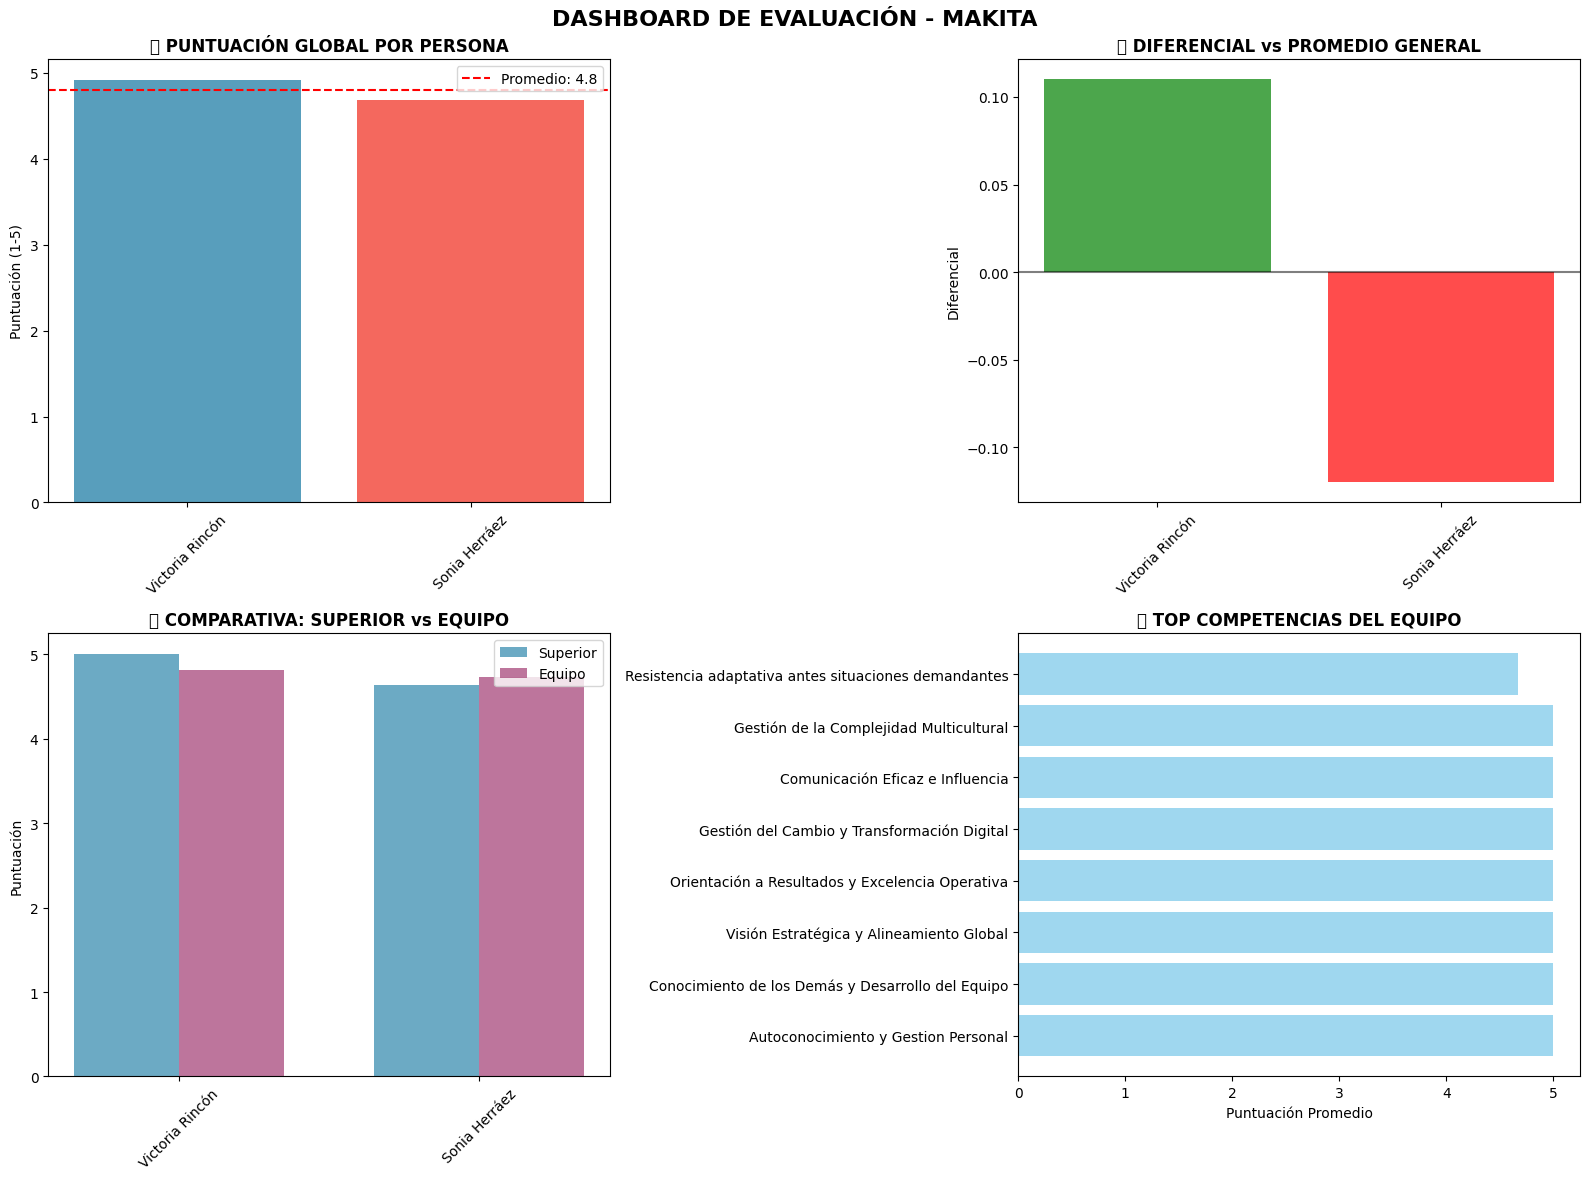

In [79]:
# 1️⃣7️⃣ Visualizaciones
print("\n🎨 GENERANDO GRÁFICOS...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DASHBOARD DE EVALUACIÓN - MAKITA', fontsize=16, fontweight='bold')

# Gráfico 1: Puntuaciones globales
personas = [r['Persona'] for r in resultados_finales]
puntuaciones = [r['Puntuacion_Global'] for r in resultados_finales]

bars1 = axes[0,0].bar(personas, puntuaciones,
                     color=['#2E86AB' if x >= promedios_generales['global_general'] else '#F24236' for x in puntuaciones],
                     alpha=0.8)
axes[0,0].axhline(y=promedios_generales['global_general'], color='red', linestyle='--',
                 label=f'Promedio: {promedios_generales["global_general"]}')
axes[0,0].set_title('📈 PUNTUACIÓN GLOBAL POR PERSONA', fontweight='bold')
axes[0,0].set_ylabel('Puntuación (1-5)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend()

# Gráfico 2: Diferenciales globales
diferenciales = [r['Diferencial_Global'] for r in resultados_finales]
colors_diff = ['green' if x >= 0 else 'red' for x in diferenciales]

bars2 = axes[0,1].bar(personas, diferenciales, color=colors_diff, alpha=0.7)
axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0,1].set_title('🎯 DIFERENCIAL vs PROMEDIO GENERAL', fontweight='bold')
axes[0,1].set_ylabel('Diferencial')
axes[0,1].tick_params(axis='x', rotation=45)

# Gráfico 3: Comparativa Superior vs Equipo
superior_scores = [r['Puntuacion_Superior'] or 0 for r in resultados_finales]
equipo_scores = [r['Puntuacion_Equipo'] or 0 for r in resultados_finales]

x = np.arange(len(personas))
width = 0.35

bars_sup = axes[1,0].bar(x - width/2, superior_scores, width, label='Superior', alpha=0.7, color='#2E86AB')
bars_eq = axes[1,0].bar(x + width/2, equipo_scores, width, label='Equipo', alpha=0.7, color='#A23B72')
axes[1,0].set_title('👥 COMPARATIVA: SUPERIOR vs EQUIPO', fontweight='bold')
axes[1,0].set_ylabel('Puntuación')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(personas, rotation=45)
axes[1,0].legend()

# Gráfico 4: Top competencias del equipo
competencias_promedio = promedios_generales['competencias_general']
top_competencias = dict(sorted(competencias_promedio.items(), key=lambda x: x[1], reverse=True)[:8])

axes[1,1].barh(list(top_competencias.keys()), list(top_competencias.values()), color='skyblue', alpha=0.8)
axes[1,1].set_title('🏆 TOP COMPETENCIAS DEL EQUIPO', fontweight='bold')
axes[1,1].set_xlabel('Puntuación Promedio')

plt.tight_layout()
plt.show()

In [80]:
# 1️⃣8️⃣ Exportar resultados
with pd.ExcelWriter(ruta_salida) as writer:
    df_resumen.to_excel(writer, sheet_name='Resumen_Personas', index=False)
    df_promedios.to_excel(writer, sheet_name='Promedios_Generales', index=False)
    estructura.to_excel(writer, sheet_name='Datos_Originales', index=False)
    medidor.to_excel(writer, sheet_name='Estructura_Competencias', index=False)

print(f"\n✅ RESULTADOS EXPORTADOS EXITOSAMENTE")
print(f"   📁 Archivo: {ruta_salida}")
print(f"   📊 Hojas: Resumen_Personas, Promedios_Generales, Datos_Originales, Estructura_Competencias")


✅ RESULTADOS EXPORTADOS EXITOSAMENTE
   📁 Archivo: /content/drive/MyDrive/Makita/Desarrollo Dashboard/Resultados_Makita_Completos.xlsx
   📊 Hojas: Resumen_Personas, Promedios_Generales, Datos_Originales, Estructura_Competencias


In [81]:
# 1️⃣9️⃣ Resumen final
print("\n" + "="*80)
print("🎉 ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print(f"   📈 Personas analizadas: {len(resultados_finales)}")
print(f"   🎯 Puntuación global promedio: {promedios_generales['global_general']}")
print(f"   📊 Grupos evaluados: {len(promedios_generales['grupos_general'])}")
print(f"   🎓 Competencias evaluadas: {len(promedios_generales['competencias_general'])}")
print(f"   💾 Resultados guardados en: {ruta_salida}")

# Mostrar el top 3 de personas
print(f"\n🏆 TOP 3 PERSONAS MEJOR EVALUADAS:")
top_personas = sorted(resultados_finales, key=lambda x: x['Puntuacion_Global'], reverse=True)[:3]
for i, persona in enumerate(top_personas, 1):
    print(f"   {i}. {persona['Persona']}: {persona['Puntuacion_Global']} (Diff: {persona['Diferencial_Global']:+.2f})")


🎉 ANÁLISIS COMPLETADO EXITOSAMENTE
   📈 Personas analizadas: 2
   🎯 Puntuación global promedio: 4.8
   📊 Grupos evaluados: 4
   🎓 Competencias evaluadas: 14
   💾 Resultados guardados en: /content/drive/MyDrive/Makita/Desarrollo Dashboard/Resultados_Makita_Completos.xlsx

🏆 TOP 3 PERSONAS MEJOR EVALUADAS:
   1. Victoria Rincón: 4.91 (Diff: +0.11)
   2. Sonia Herráez: 4.68 (Diff: -0.12)
